## EDA

In [155]:
## get defender data only
## 1. Previous season form -> Assume previous season form carries over to current season
## 2. % Ownership now -> % of ownership unlikely to increase if it is already high, vice versa
## 3. Current price -> Current price unlikely to increase if it is already high, vice versa

In [156]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [157]:
## import training data
train_set = pd.read_csv('combined_seasons_data_train.csv')

In [158]:
## visualize some data
print("Number of rows in dataframe:", train_set.shape[0])
train_set.head()

Number of rows in dataframe: 129


,Understat_ID,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,selected_by_percent,final_cost
0,847,0,1,28,744,11,114.8,110.8,66,3,125,29.2,2,0,1,45,0.3,42
1,8380,0,0,34,900,8,26.4,163.2,16,1,182,20.6,4,0,2,45,0.2,42
2,492,1,3,94,2089,24,351.8,362.8,232,17,421,94.7,7,0,8,50,0.7,48
3,508,0,3,36,751,10,169.4,171.8,77,3,168,41.9,2,0,0,45,0.3,42
4,342,0,0,2,90,1,5.4,3.6,4,0,9,1.3,0,0,0,45,0.2,42


<AxesSubplot:>

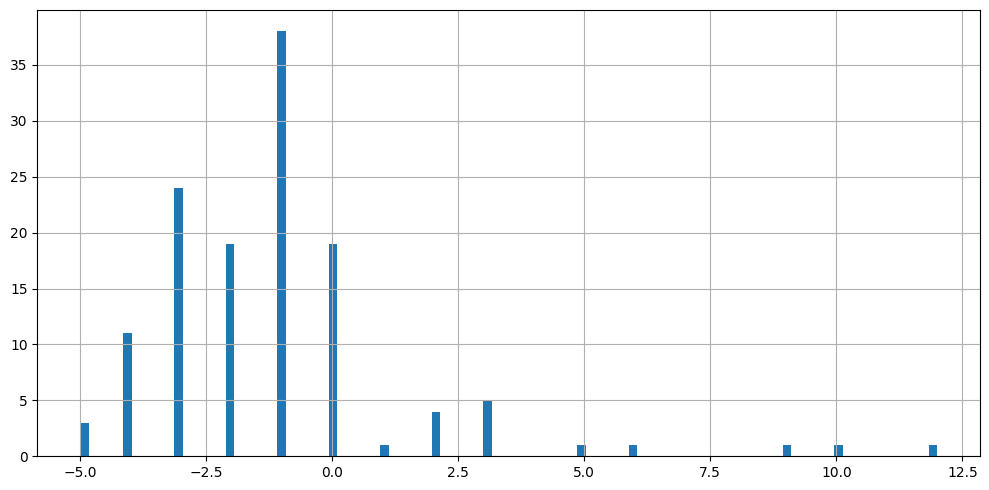

In [159]:
## histogram of price difference over the season
diff_train = (train_set['final_cost'] - train_set['now_cost'])
diff_train.hist(bins=100)

In [160]:
## Identify some outliers

## -5 pointers (Lucas Digne, Luke Shaw, Matt Doherty)
train_set.iloc[diff_train[diff_train == -5].index, :]

# ## Reece James (10)
# train_set.iloc[35, :]

# ## Joao Cancelo (12)
# train_set.iloc[81, :]

,Understat_ID,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,selected_by_percent,final_cost
43,1823,0,9,120,2681,42,704.2,592.6,136,18,590,143.5,9,1,2,55,22.6,50
79,1006,1,5,124,2653,33,1085.9,596.0,243,22,640,192.8,10,0,8,55,46.0,50
109,6852,0,2,47,1238,15,182.4,257.2,79,4,222,52.0,4,1,2,50,1.3,45


In [161]:
## normalize the data
std_train = train_set.std()
mean_train = train_set.mean()
norm_train_set = (train_set - mean_train) /std_train
norm_train_set.head()

,Understat_ID,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,selected_by_percent,final_cost
0,-0.988287,-0.792411,-0.122680,-0.868344,-0.933969,-0.857735,-0.245708,-1.073671,-0.615864,-0.425463,-0.979679,-0.767668,-0.898867,-0.377497,-0.751902,-0.577350,-0.492642,-0.737554
1,1.405517,-0.792411,-0.602248,-0.728032,-0.775913,-1.061382,-0.630216,-0.847806,-1.046049,-0.801385,-0.709203,-0.942553,-0.435052,-0.377497,-0.285578,-0.577350,-0.507370,-0.737554
2,-1.101098,0.162926,0.836455,0.675097,0.428755,0.024732,0.785158,0.012550,0.812349,2.205996,0.424897,0.564299,0.260671,-0.377497,2.512364,0.288675,-0.433731,0.106923
3,-1.096013,-0.792411,0.836455,-0.681261,-0.926877,-0.925618,-0.008217,-0.810737,-0.521224,-0.425463,-0.775636,-0.509409,-0.898867,-0.377497,-1.218225,-0.577350,-0.492642,-0.737554
4,-1.148764,-0.792411,-0.602248,-1.476367,-1.596587,-1.536557,-0.721559,-1.535747,-1.149293,-0.989347,-1.530121,-1.335026,-1.362682,-0.377497,-1.218225,-0.577350,-0.507370,-0.737554


In [162]:
## import test data
test_set = pd.read_csv('combined_seasons_data_test.csv')

In [163]:
## visualize some data
print("Number of rows in dataframe:", test_set.shape[0])
test_set.head()

Number of rows in dataframe: 141


,Understat_ID,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,selected_by_percent,final_cost
0,847,1,1,48,1481,27,306.5,246.0,76.0,3,292,63.0,3,0,3,45,0.3,42
1,8380,0,0,1,180,4,12.3,55.4,11.0,0,35,7.9,0,0,1,45,0.1,45
2,1749,1,0,29,840,16,6.9,242.4,49.0,2,152,29.9,2,1,2,45,0.2,42
3,8089,1,3,106,1916,21,335.9,365.2,198.0,11,454,90.1,11,0,0,50,4.5,46
4,5613,5,0,146,3063,38,129.3,703.0,453.0,16,682,128.4,13,1,6,50,7.5,52


<AxesSubplot:>

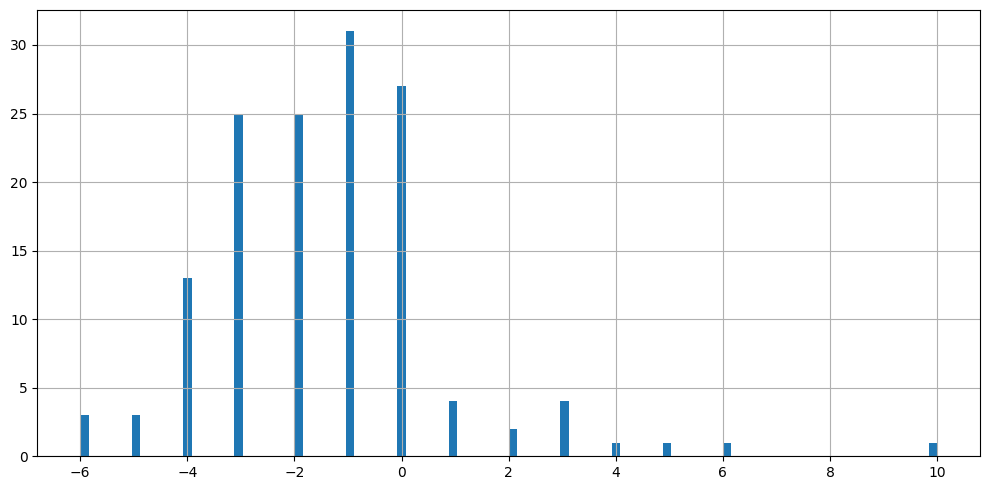

In [164]:
## histogram of price difference over the season
diff_test = (test_set['final_cost'] - test_set['now_cost'])
diff_test.hist(bins=100)

In [165]:
## Identify some outliers

## -6 players (Trevoh Chalobah, Daniel Amartey, Luke Thomas (??? why though))
# test_set.iloc[diff_test[diff_test == -6].index, :]

# ## Kieran Trippier (10)
# test_set.iloc[diff_test[diff_test == 10].index, :]

# ## Fabian Schär (6)
# test_set.iloc[diff_test[diff_test == 6].index, :]

# ## Ben White (6)
test_set.iloc[diff_test[diff_test == 5].index, :]

,Understat_ID,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,selected_by_percent,final_cost
6,7298,0,0,107,2880,35,182.3,592.8,150.0,9,557,92.5,13,0,3,45,8.9,50


In [166]:
## normalize the data
std_test = test_set.std()
mean_test = test_set.mean()
norm_test_set = (test_set - mean_test) /std_test
norm_test_set.head()

,Understat_ID,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,selected_by_percent,final_cost
0,-1.194900,0.017939,-0.211833,-0.353178,-0.193625,0.133078,0.639711,-0.508257,-0.582001,-0.391344,-0.184071,-0.131311,-0.539203,-0.383391,-0.056182,-0.307428,-0.364670,-0.531522
1,1.032943,-0.825204,-0.685935,-1.370349,-1.557738,-1.344910,-0.788824,-1.358174,-1.043782,-0.903848,-1.416324,-1.274228,-1.183504,-0.383391,-0.810622,-0.307428,-0.390870,-0.060172
2,-0.928139,0.017939,-0.685935,-0.764375,-0.865721,-0.573786,-0.815045,-0.524310,-0.773818,-0.562179,-0.855337,-0.817891,-0.753970,2.319515,-0.433402,-0.307428,-0.377770,-0.531522
3,0.946882,0.017939,0.736371,0.902055,0.262477,-0.252484,0.782467,0.023276,0.284727,0.975332,0.592680,0.430813,1.178935,-0.383391,-1.187842,0.559520,0.185540,0.096944
4,0.214618,3.390511,-0.685935,1.767732,1.465120,0.839942,-0.220712,1.529583,2.096332,1.829504,1.685884,1.225255,1.608469,2.319515,1.075478,0.559520,0.578548,1.039644


## Model

In [167]:
## build the linear regression model
import torch
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        # using mm module for matrix multiplication 
        y_pred = self.linear(x)
        return y_pred

In [190]:
## setup hyperparameters
inputDim = len(combined_seasons_data_train.columns) - 1          
outputDim = 1 
learningRate = 0.1 
epochs = 100

In [169]:
# split train set into train and valid set
from sklearn.model_selection import train_test_split
norm_train_set, norm_valid_set = train_test_split(norm_train_set, test_size=0.2, random_state=42)

In [170]:
norm_train_set

,Understat_ID,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,selected_by_percent,final_cost
70,-1.054702,0.162926,-0.122680,0.604941,0.281844,-0.246796,0.128797,-0.119348,-0.426583,0.326382,0.372700,-0.098634,0.724487,-0.377497,-0.751902,1.154701,0.111201,0.951401
78,-0.721356,1.118263,0.356887,1.376661,1.399378,0.839318,-0.163934,1.472053,2.498673,0.514344,1.426131,1.206897,1.652117,-0.377497,3.911335,1.154701,0.803412,0.951401
47,1.185934,-0.792411,0.356887,0.815410,1.030582,0.771436,-0.378372,1.079806,0.124053,0.326382,0.975338,0.362979,1.188302,-0.377497,0.647069,0.288675,-0.330636,-0.033823
0,-0.988287,-0.792411,-0.122680,-0.868344,-0.933969,-0.857735,-0.245708,-1.073671,-0.615864,-0.425463,-0.979679,-0.767668,-0.898867,-0.377497,-0.751902,-0.577350,-0.492642,-0.737554
12,1.197692,1.118263,-0.602248,1.259734,1.549329,1.518139,-0.596289,1.447053,1.190911,0.514344,1.179382,0.692412,1.420210,-0.377497,0.180746,0.288675,-0.345363,0.247670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.728337,-0.792411,-0.602248,-0.517562,-0.182191,-0.111032,-0.658054,-0.175383,-0.202887,-0.425463,-0.358059,-0.436202,-0.435052,-0.377497,-0.751902,-0.577350,-0.463187,-0.737554
14,1.559320,-0.792411,0.356887,0.558170,0.716497,0.771436,0.789943,0.693594,-0.237302,0.514344,0.647920,0.645640,1.188302,2.327896,1.579716,0.288675,-0.256996,0.810654
92,-1.233292,0.162926,-0.602248,-0.821574,-0.416235,-0.178914,-0.705900,-0.469353,-0.185680,-0.801385,-0.813597,-0.596851,-0.898867,2.327896,0.647069,-0.577350,-0.492642,-0.878300
51,0.415328,0.162926,-0.602248,-0.143395,0.152157,0.432025,-0.247448,0.188415,0.167072,-0.425463,0.135440,0.015244,-0.203144,-0.377497,-0.285578,0.288675,-0.301180,0.247670


In [172]:
# Converting inputs and labels to tensors
inputs_train = norm_train_set.iloc[:, : norm_train_set.shape[1] - 1].values
labels_train = norm_train_set.iloc[:, norm_train_set.shape[1] - 1].values
inputs_valid = norm_valid_set.iloc[:, : norm_valid_set.shape[1] - 1].values
labels_valid = norm_valid_set.iloc[:, norm_valid_set.shape[1] - 1].values
inputs_test = norm_test_set.iloc[:, : norm_test_set.shape[1] - 1].values
labels_test = norm_test_set.iloc[:, norm_test_set.shape[1] - 1].values

if torch.cuda.is_available():
    inputs_train = torch.tensor(inputs_train, dtype=torch.float32).cuda()
    labels_train = torch.tensor(labels_train, dtype=torch.float32).cuda()
    inputs_valid = torch.tensor(inputs_valid, dtype=torch.float32).cuda()
    labels_valid = torch.tensor(labels_valid, dtype=torch.float32).cuda()
    inputs_test = torch.tensor(inputs_test, dtype=torch.float32).cuda()
    labels_test = torch.tensor(labels_test, dtype=torch.float32).cuda()

else:
    inputs_train = torch.tensor(inputs_train, dtype=torch.float32)
    labels_train = torch.tensor(labels_train, dtype=torch.float32)
    inputs_valid = torch.tensor(inputs_valid, dtype=torch.float32)
    labels_valid = torch.tensor(labels_valid, dtype=torch.float32)
    inputs_test = torch.tensor(inputs_test, dtype=torch.float32)
    labels_test = torch.tensor(labels_test, dtype=torch.float32)
    
labels_train = labels_train[:, None]
labels_valid = labels_valid[:, None]
labels_test = labels_test[:, None]

In [152]:
inputs_train.shape

torch.Size([129, 17])

In [203]:
model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

loss_array_train = []
loss_array_valid = []
for epoch in range(epochs):
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs_train = model(inputs_train)
    outputs_valid = model(inputs_valid)

    # get loss for the predicted output
    loss_valid = criterion(outputs_valid, labels_valid)
    loss_train = criterion(outputs_train, labels_train)
    # print(loss_train)
    
    # get gradients w.r.t to parameters
    loss_train.backward()

    # update parameters
    optimizer.step()

    loss_array_train.append(loss_train.item())
    loss_array_valid.append(loss_valid.item())
    # print('epoch {}, loss {}'.format(epoch, loss.item()))

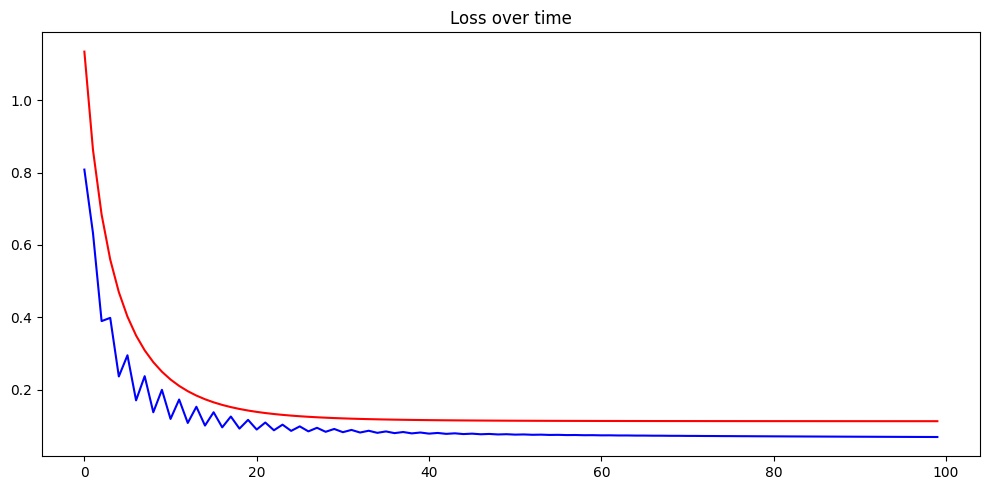

In [205]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

x_train = np.array([i for i in range(len(loss_array_train))])
y_train = np.array(loss_array_train)
y_valid = np.array(loss_array_valid)
plt.title("Loss over time")
plt.plot(x_train, y_train, color="red")
plt.plot(x_train, y_valid, color="blue")

plt.show()

## Analysis

In [223]:
## get the predicted results of the model on the train set
with torch.no_grad(): 
    if torch.cuda.is_available():
        norm_predicted = model(inputs_train).cpu().data.numpy()
    else:
        norm_predicted = model(inputs_train).data.numpy()
    predicted = (norm_predicted * std_train[-1]) + mean_train[-1]
    predicted = predicted.reshape(-1)
predicted

array([55.290062, 54.360077, 48.60585 , 43.982662, 50.027023, 50.322643,
       50.40863 , 42.87924 , 38.470848, 48.8987  , 42.73351 , 38.066574,
       60.88307 , 50.432568, 47.84435 , 80.82274 , 44.01015 , 60.662025,
       48.13882 , 50.78572 , 43.508358, 54.432476, 48.847473, 37.64733 ,
       41.363777, 43.53524 , 50.54488 , 38.21031 , 44.06859 , 43.09432 ,
       43.274307, 62.678528, 37.781487, 55.448437, 58.70881 , 44.4573  ,
       43.878365, 49.17038 , 48.82285 , 43.82123 , 52.793514, 57.242188,
       42.83841 , 48.90487 , 49.619   , 43.620583, 43.098248, 43.098553,
       49.763702, 42.625744, 54.925594, 43.45128 , 49.11289 , 52.68551 ,
       43.61797 , 52.238567, 54.149323, 36.95239 , 47.71727 , 41.967247,
       43.816326, 38.273876, 43.50462 , 55.46111 , 49.40958 , 42.62519 ,
       42.434193, 44.08337 , 37.94942 , 52.77182 , 42.796352, 48.986015,
       44.96991 , 55.814884, 56.712223, 41.998   , 44.80539 , 65.857574,
       43.9719  , 43.6288  , 43.19211 , 43.42434 , 

In [226]:
correct_score = (norm_train_set["final_cost"].to_numpy()* std_train[-1]) + mean_train[-1]
correct_score

array([54., 54., 47., 42., 49., 49., 48., 41., 38., 49., 45., 40., 62.,
       49., 46., 84., 44., 56., 53., 48., 44., 54., 47., 40., 42., 44.,
       48., 39., 43., 41., 42., 72., 38., 52., 65., 44., 45., 46., 49.,
       45., 50., 53., 47., 45., 53., 45., 45., 42., 48., 45., 52., 42.,
       49., 51., 42., 54., 53., 40., 47., 42., 44., 37., 42., 50., 49.,
       43., 45., 43., 39., 54., 44., 50., 43., 60., 61., 47., 43., 68.,
       42., 43., 44., 44., 42., 49., 45., 48., 39., 49., 44., 44., 39.,
       47., 43., 49., 41., 46., 45., 52., 42., 53., 41., 49., 50.])

In [227]:
diff = (correct_score - predicted) ** 2
rmse = (diff.sum()/len(combined_seasons_data_train)) ** 0.5

## rmse should be less than 1 for it to be reliable
rmse

2.1174194895137606

In [228]:
## get the predicted results of the model on the test set
with torch.no_grad(): 
    if torch.cuda.is_available():
        norm_predicted = model(inputs_test).cpu().data.numpy()
    else:
        norm_predicted = model(inputs_test).data.numpy()
    predicted = (norm_predicted * std_train[-1]) + mean_train[-1]
    predicted = predicted.reshape(-1)
predicted

array([45.416023, 45.61415 , 44.26683 , 52.667957, 51.381527, 45.84022 ,
       46.286335, 46.934704, 46.40319 , 45.28224 , 45.88923 , 43.48397 ,
       51.849243, 45.513153, 51.843575, 43.87365 , 47.1534  , 40.249123,
       45.967144, 45.994083, 46.57062 , 44.813854, 40.383125, 45.14382 ,
       46.355537, 44.526382, 45.12702 , 47.25835 , 52.978382, 42.425026,
       45.493507, 50.445644, 55.26293 , 57.9611  , 62.809998, 60.605877,
       51.424034, 50.741474, 39.48659 , 40.167877, 45.88088 , 44.31336 ,
       44.952564, 44.58377 , 45.574463, 45.510002, 43.603764, 45.4991  ,
       42.482384, 46.134975, 39.800453, 45.992004, 43.59217 , 43.968296,
       43.95701 , 46.083805, 43.674328, 46.66793 , 45.040356, 45.618847,
       38.83915 , 39.702393, 43.898533, 43.572712, 43.306217, 46.149498,
       43.915787, 44.58501 , 40.204567, 63.690155, 68.3922  , 71.841515,
       80.28648 , 45.076508, 40.250626, 50.755444, 46.62395 , 39.430958,
       51.7901  , 57.644493, 75.62124 , 50.43329 , 

In [229]:
(norm_test_set["final_cost"].to_numpy()* std_train[-1]) + mean_train[-1]

array([43.46385239, 46.81278657, 43.46385239, 47.92909796, 54.62696631,
       51.27803214, 52.39434353, 46.81278657, 43.46385239, 43.46385239,
       45.69647517, 49.04540935, 47.92909796, 45.69647517, 46.81278657,
       43.46385239, 45.69647517, 40.11491821, 44.58016378, 46.81278657,
       45.69647517, 46.81278657, 41.2312296 , 43.46385239, 50.16172074,
       46.81278657, 47.92909796, 43.46385239, 51.27803214, 42.347541  ,
       43.46385239, 49.04540935, 56.8595891 , 55.7432777 , 59.09221188,
       61.32483467, 52.39434353, 45.69647517, 40.11491821, 40.11491821,
       45.69647517, 45.69647517, 46.81278657, 46.81278657, 46.81278657,
       42.347541  , 43.46385239, 44.58016378, 43.46385239, 44.58016378,
       41.2312296 , 42.347541  , 45.69647517, 43.46385239, 40.11491821,
       44.58016378, 43.46385239, 42.347541  , 40.11491821, 44.58016378,
       38.99860682, 40.11491821, 45.69647517, 46.81278657, 45.69647517,
       46.81278657, 46.81278657, 46.81278657, 40.11491821, 62.44

In [220]:
chosen_id = 80

In [221]:
print("predicted", predicted[chosen_id])
print("actual", combined_seasons_data_test["final_cost"].to_numpy()[chosen_id])
diff = predicted[chosen_id] - combined_seasons_data_test["final_cost"].to_numpy()[chosen_id]
print("diff", diff)

predicted 43.19211
actual 40
diff 3.192108154296875


In [35]:
(combined_seasons_data_test["final_cost"] - predicted).to_numpy().reshape(-1)

array([ -2.99296188,  -0.49599457,  -2.66542435,  -5.64329147,
         1.07939148,   3.37411118,   3.82474136,  -0.79173279,
        -3.76218796,  -2.98664856,  -1.40076065,   3.46881866,
        -4.05096436,  -0.76681519,  -6.30047607,  -1.97618866,
        -1.00922012,  -1.04502487,  -1.67201614,  -0.35131073,
        -2.56882095,   1.07389832,  -0.15713501,  -3.61369324,
         1.10530472,   0.64011002,   1.15894318,  -4.2165947 ,
        -3.78801727,  -2.70965576,  -3.37642288,  -3.70832062,
        -2.09077072,  -4.45111847,  -5.72525406,  -2.62313461,
        -0.83996582,  -6.42219162,  -0.8274765 ,  -1.21941376,
        -1.49181747,  -0.07038116,  -0.10166931,   0.156353  ,
        -0.40329361,  -3.63193512,  -1.50513077,  -2.44562149,
        -0.155056  ,  -2.64737701,   0.62387466,  -4.08930969,
        -0.08435059,  -2.16708374,  -5.30945587,  -2.60184479,
        -2.11673355,  -5.42454147,  -5.78081512,  -2.60823059,
        -1.25679016,  -0.94708252,  -0.20582581,   1.92

In [27]:
diff = (combined_seasons_data_test["final_cost"] - predicted) ** 2
rmse = (diff.sum()/len(combined_seasons_data_test)) ** 0.5

## rmse should be less than 1 for it to be reliable
rmse

3.2105110943233717